### Ensemble learning

Ensemble learning is a general meta approach to machine learning that seeks better predictive performance by combining the 
predictions from multiple models.

The three main classes of ensemble learning methods are bagging, stacking, and boosting

### gradient-boosted decision tree

As gradient boosting is one of the boosting algorithms it is used to minimize bias error of the model.

Gradient boosting algorithm can be used for predicting not only continuous target variable (as a Regressor) but also categorical
target variable (as a Classifier). When it is used as a regressor, the cost function is Mean Square Error (MSE) and when it is
used as a classifier then the cost function is Log loss.

### applications

i) Gradient Boosting Algorithm is generally used when we want to decrease the Bias error.

ii) Gradient Boosting Algorithm can be used in regression as well as classification problems. In regression problems, 
the cost function is MSE whereas, in classification problems, the cost function is Log-Loss.

### bias

Bias is a phenomenon that skews the result of an algorithm in favor or against an idea.

Bias is considered a systematic error that occurs in the machine learning model itself due to incorrect assumptions
in the ML process.

1. A model with a higher bias would not match the data set closely.
2. A low bias model will closely match the training data set.

### variance

Variance refers to the changes in the model when using different portions of the training data set.

1. Models with high bias will have low variance.
2. Models with high variance will have a low bias.

### underfitting overfitting

1. Underfitting occurs when the model is unable to match the input data to the target data. This happens when the model is not 
   complex enough to match all the available data and performs poorly with the training dataset.


2. Overfitting relates to instances where the model tries to match non-existent data. This occurs when dealing with highly   complexmodels where the model will match almost all the given data points and perform well in training datasets. However, the model would not be able to generalize the data point in the test data set to predict the outcome accurately.

In [ ]:
Algorithm	            Bias	               Variance


Linear Regression	    High Bias	           Less Variance
Decision Tree	        Low Bias	           High Variance
Bagging	                Low Bias	           High Variance (Less than Decision Tree)
Random Forest	        Low Bias	           High Variance (Less than Decision Tree and Bagging)

### gradient boosted decision tree

#### pros

1. often best off the shelf accuracy of may problems
2. using model for prediction require only modest memory and is fast
3. doesnot require carefull norrmalization of feature to performe well
4. like a decision tree handle a mixture of a feature types

#### cons 

1. like random forests the model are often for diffucult human to interpret
2. required careful tuning of the learning rate and other parameter
3. train9ing can required significant computation
4. like decision tree not recommend for text classification and other problems with very high dimentional sparse features 
   for accuracy and computational cost resons

<IPython.core.display.Javascript object>


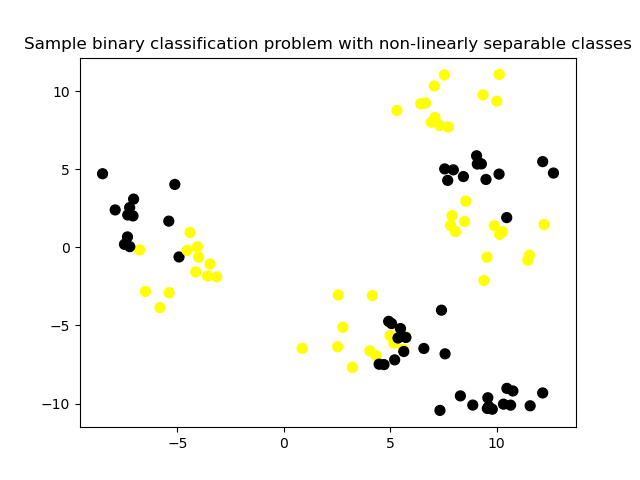

In [12]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from adspy_shared_utilities import load_crime_dataset
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# fruits dataset
fruits = pd.read_table('assets/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

### gradient boost decision tree

<IPython.core.display.Javascript object>


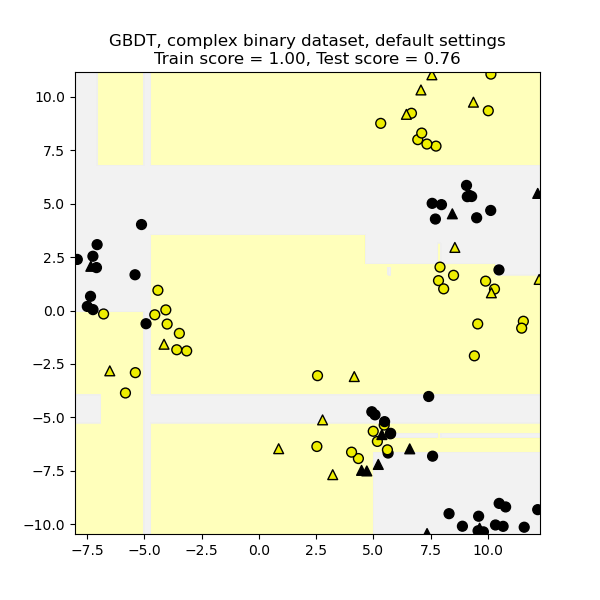

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

### gradient boost decision tree on fruit dataset

<IPython.core.display.Javascript object>


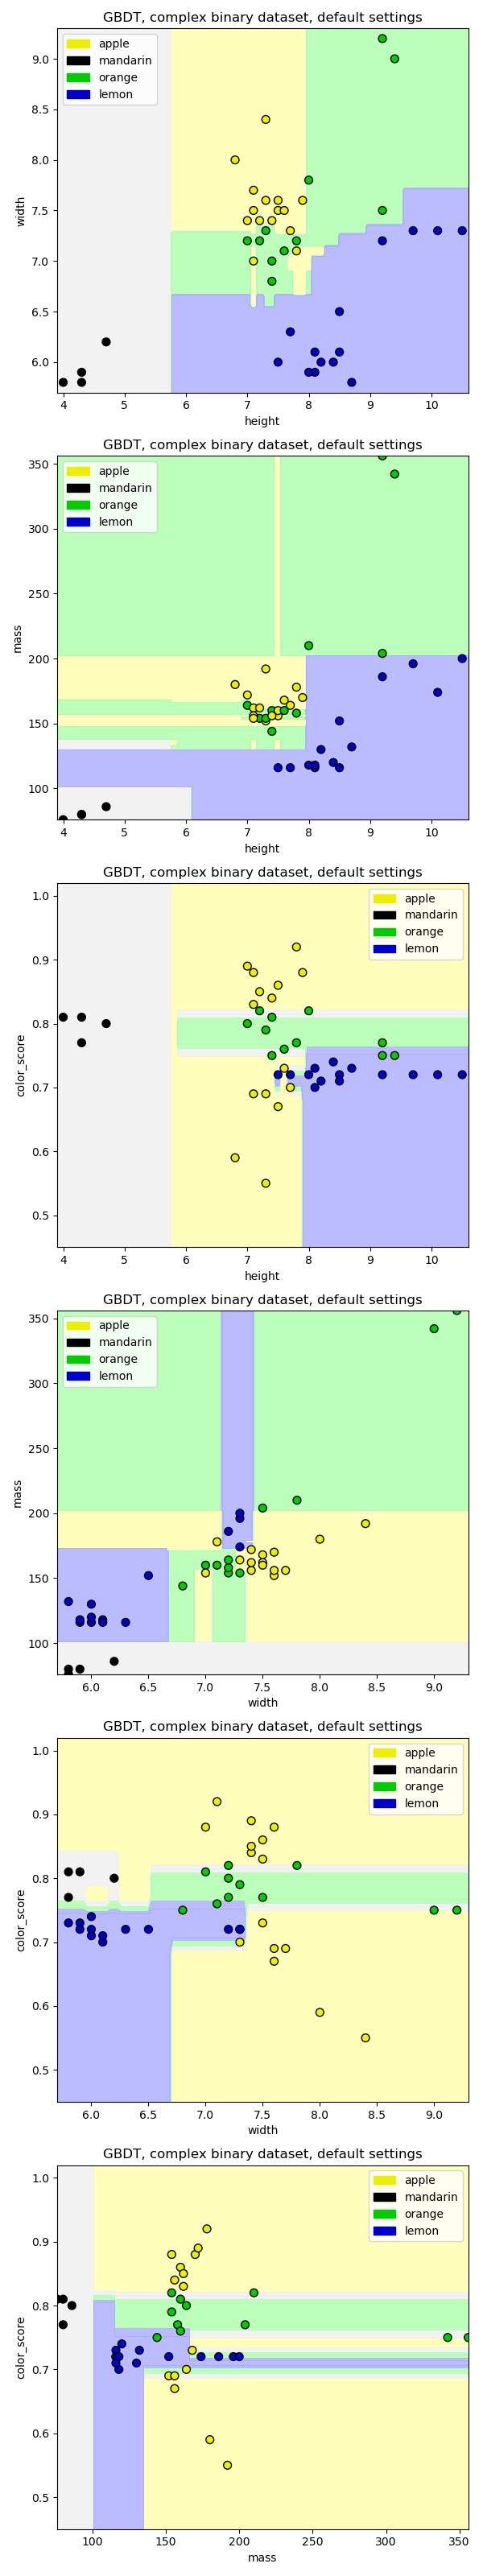

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.values,
                                                   y_fruits.values,
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)
    
    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])
    
plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

### gradint boosted decision tree on real world  dataset

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97
